## Objectives 
- 고객의 대출 등급에 따른 분류
- EDA(탐색적데이터탐색) 이후 isnull().sum(), 단위제거 및 자료형 변환 
- pd.concat, Feature Engineering

train.csv [파일] 
고객 관련 금융 정보
ID : 대출 고객의 고유 ID
대출등급 : 예측 목표


test.csv [파일]
고객 관련 금융 정보
ID : 대출 고객의 고유 ID
대출등급이 존재하지 않음


sample_submission.csv [파일] - 제출 양식
ID : 대출 고객의 고유 ID
대출등급 : test.csv에서 제공된 고객의 대출등급을 예측하여 기입


In [47]:
### train에는 대출등급이 존재, but test에는 대출등급이 없음.

## Random Seed

In [48]:
import numpy as np
import random
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(30) # Seed 고정

####
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [49]:
file_path1 = 'D:\Code\[중]고객 대출 등급 문류 해커톤/train.csv'

df_train = pd.read_csv(file_path1)

print(df_train)

print('*'*80)

file_path2 = 'D:\Code\[중]고객 대출 등급 문류 해커톤/test.csv'

df_test = pd.read_csv(file_path2)

print(df_test)

                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0           

In [50]:
df_train_col = df_train.columns
print(df_train_col)

print('*'*80)

df_test_col = df_test.columns
print(df_test_col)

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')
********************************************************************************
Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'],
      dtype='object')


In [51]:
df_train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [52]:
df_test.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
dtype: int64

## Outlier(이상치)

- 이상치 배제.

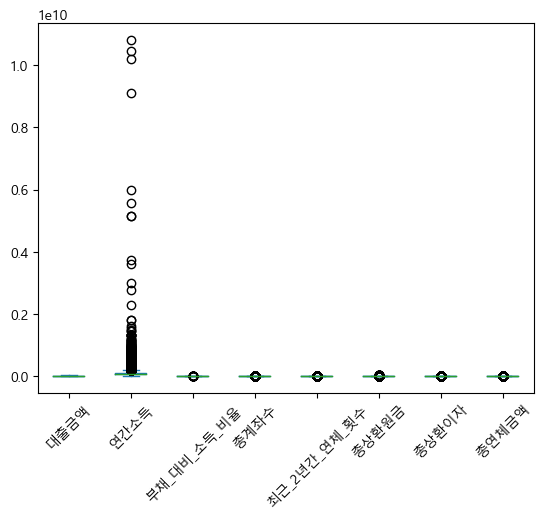

********************************************************************************


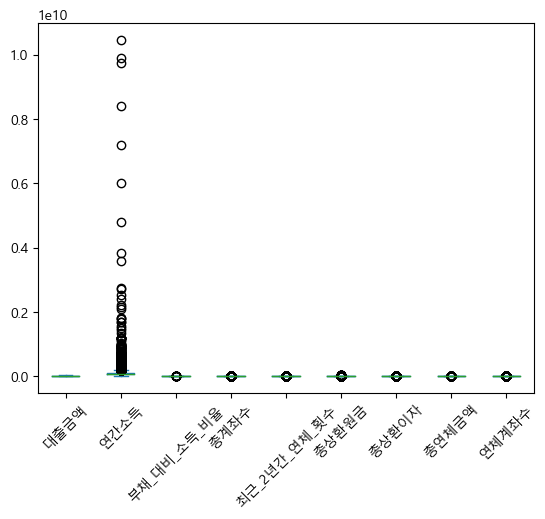

********************************************************************************


In [53]:
df_train.loc[:, ['ID', '대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자','총연체금액']].plot(kind='box', rot=45)
plt.show()

print('*'*80)

df_test.loc[:, ['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']].plot(kind='box', rot=45)
plt.show()

print('*'*80)

In [54]:
df_train.loc[:,'근로기간'].value_counts()

## 1 year라는 값이 존재함에도 여러개로 분할.
## 3 year도 마찬가지. 데이터에 노이즈가 섞여있음.

## 근로기간 컬럼을 제외하고 모델 학습.

근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64

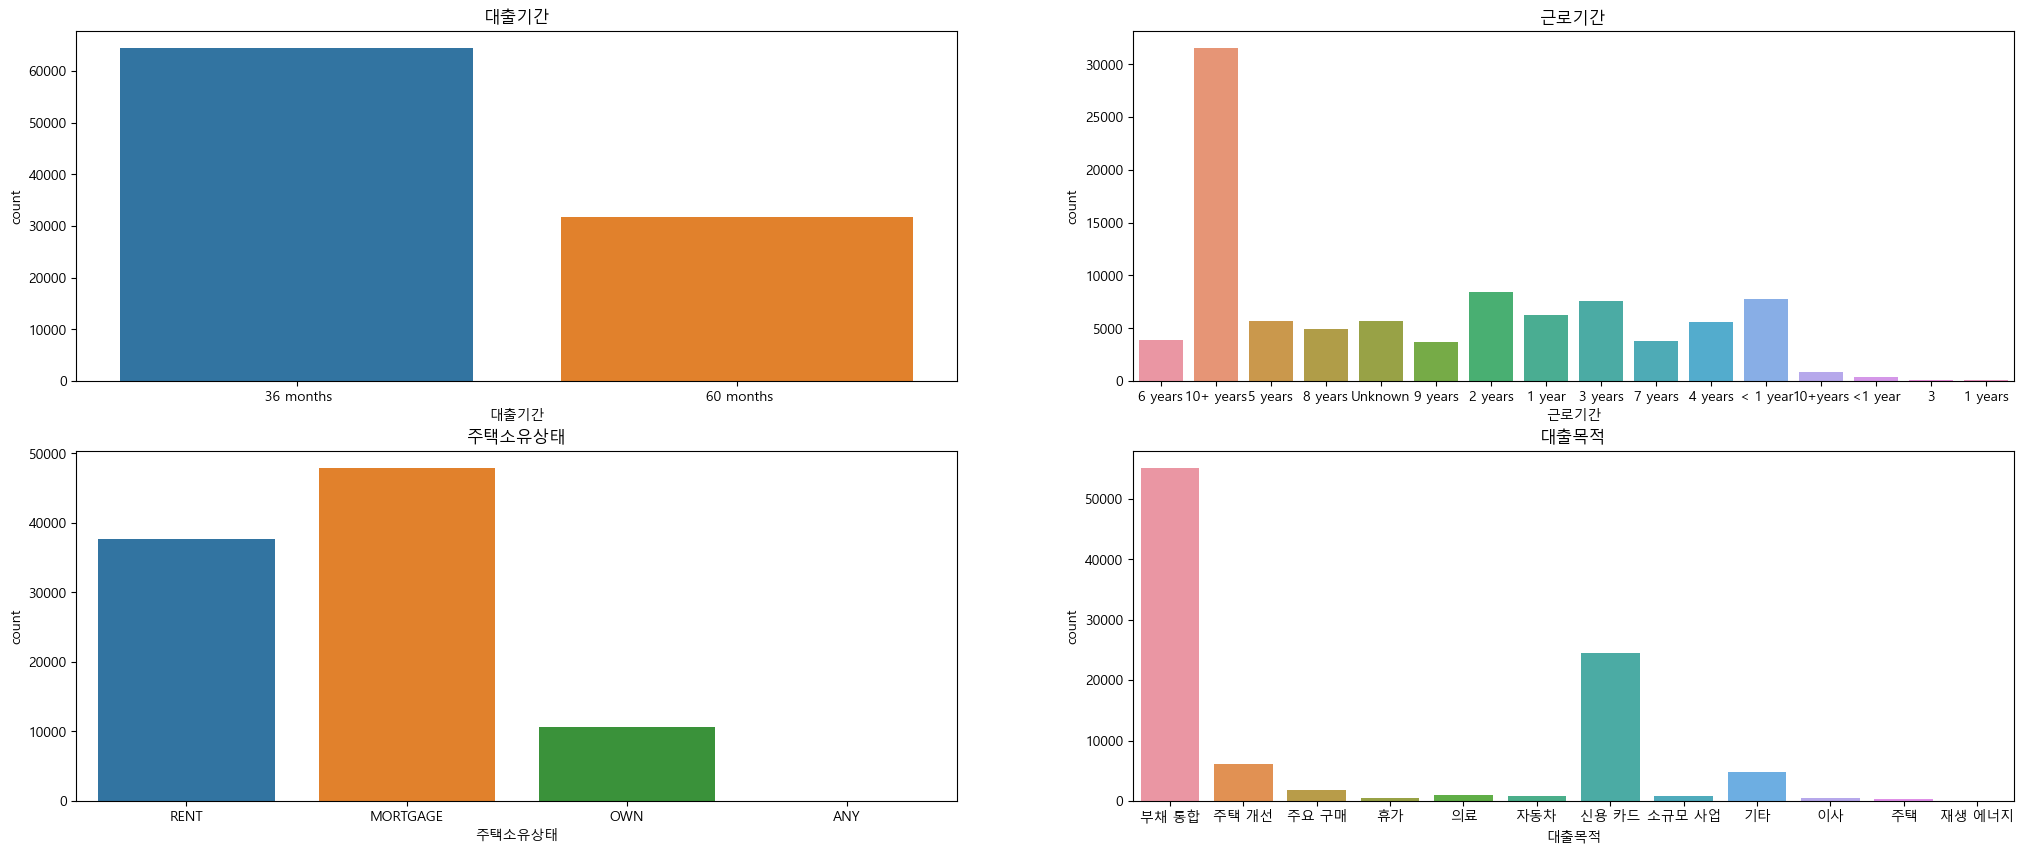

In [55]:
# Visualization Package Load

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정하기

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


fig, axes = plt.subplots(2, 2, figsize=(25, 10)) ## 2x2 형식으로 4개 그래프 동시에 출력.

sns.countplot(x=df_train['대출기간'], ax=axes[0][0]).set_title('대출기간')
sns.countplot(x=df_train['근로기간'], ax=axes[0][1]).set_title('근로기간')
sns.countplot(x=df_train['주택소유상태'], ax=axes[1][0]).set_title('주택소유상태')
sns.countplot(x=df_train['대출목적'], ax=axes[1][1]).set_title('대출목적')

plt.show()

## X_train와 y_train로 나눠 데이터를 구성 1 : Data-PreProcessing

- 나중에 모델은 주어진 상황(x)만 가지고 결과(y)인 고객 대출등급을 예측해야하기 때문.

- 이 때, X_train에는 실질적인 정보가 없는 ID와 노이즈가 존재하는 근로기간 컬럼을 제외하여 

- 구성하여 상황(x)를 설정, 이에 따른 결과(y)인 대출등급을 y_train으로 설정.

#### 이는 모델에게 해결해야 하는 문제(X_train)와 이에 대한 답(y_train)을 학습시켜, 

나중에는 문제(X_test)만 가지고도 예측(predict)이 가능하도록 해주기 때문.

In [56]:
X_train = df_train.drop(columns=['ID', '대출등급', '근로기간'])
y_train = df_train['대출등급']

X_test = df_test.drop(columns=['ID', '근로기간'])

In [57]:
X_train.columns

# 범주형(categorical) 변수가 존재, 어떤 변수가 존재..? 주택소유상태?

# 이를 LabelEncoder을 통해 수치화를 진행.

# LabelEncoder는 범주형 변수 내부에 존재하는 각 값에게 수치를 부여하여, 해당 값들을 수치화합니다.

#########

# LabelEncoder의 .fit()을 활용하여 train 데이터에 존재하는 변수에 대해 학습시킨 후, 
# .transform() 기능을 사용하면 train 데이터와 test 데이터에 대해서 모두 수치화를 진행할 수 있음.
'''
# 여기서 주의할 점!
test 데이터에는 train 데이터에 존재하지 않았던 사례가 있을 수 있음.
예를 들어, test 데이터에서 train 데이터에 존재하지 않는 새로운 직업을 가진 사람이
존재할 수 있음.

그렇다고 이후에 생길 모든 작업에 대한 경우를 알아내서 LabelEncoder에 기억시킬 수도 없음.
이것이 LabelEncoder를 test_x에 .fit() 시킬 수 있을 경우 data leakage가 발생하는 이유임.

그래서 그런 새로운 경우가 생길 때를 대비해, LabelEncoder가 모르는 값을 정했을 때
새로운 수치를 부여하라고 정해줘야함. 

이를 위해 LabelEncoder가 알고 있는 경우(le.classes_)에 새로운 경우를 알려주는 (.append(기존값, 새로운 값)) 코드를
만들어 볼 것임.

'''

'\n# 여기서 주의할 점!\ntest 데이터에는 train 데이터에 존재하지 않았던 사례가 있을 수 있음.\n예를 들어, test 데이터에서 train 데이터에 존재하지 않는 새로운 직업을 가진 사람이\n존재할 수 있음.\n\n그렇다고 이후에 생길 모든 작업에 대한 경우를 알아내서 LabelEncoder에 기억시킬 수도 없음.\n이것이 LabelEncoder를 test_x에 .fit() 시킬 수 있을 경우 data leakage가 발생하는 이유임.\n\n그래서 그런 새로운 경우가 생길 때를 대비해, LabelEncoder가 모르는 값을 정했을 때\n새로운 수치를 부여하라고 정해줘야함. \n\n이를 위해 LabelEncoder가 알고 있는 경우(le.classes_)에 새로운 경우를 알려주는 (.append(기존값, 새로운 값)) 코드를\n만들어 볼 것임.\n\n'

## 범주형 변수 수치화 (Data-PreProcessing 2)

In [58]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['대출기간', '주택소유상태', '대출목적']

for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(X_train[i])
    X_train[i]=le.transform(X_train[i])
    for case in np.unique(X_test[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    X_test[i]=le.transform(X_test[i])
    
print(X_train)

print('*'*80)

print(X_test)

           대출금액  대출기간  주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  대출목적  \
0      12480000     0       3   72000000        18.90    15     1   
1      14400000     1       1  130800000        22.33    21    10   
2      12000000     0       1   96000000         8.60    14     1   
3      14400000     0       1  132000000        15.09    15     1   
4      18000000     1       3   71736000        25.39    19     8   
...         ...   ...     ...        ...          ...   ...   ...   
96289  14400000     0       1  210000000         9.33    33     3   
96290  28800000     1       1  132000000         5.16    25    10   
96291  14400000     0       1   84000000        11.24    22     3   
96292  15600000     0       1   66330000        17.30    21     1   
96293   8640000     0       3   50400000        11.80    14     3   

       최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  연체계좌수  
0                 0        0       0.0    0.0    0.0  
1                 0   373572  234060.0    0.0    0.0  
2     

## 랜덤 포레스트 모델을 이용한 분류(GridSearchCV)

### Model Learning

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

base_rf = RandomForestClassifier(random_state=0)

params = {'n_estimators' : [100, 200, 300],
          'max_depth' : [5,6]}

grid_rf = GridSearchCV(
    estimator=base_rf,
    param_grid=params,
    scoring='accuracy',
    cv=10
)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 6], 'n_estimators': [100, 200, 300]},
             scoring='accuracy')

## Model Predict

In [64]:
best_rf = RandomForestClassifier(random_state=0)

In [65]:
print(grid_rf.best_params_)

{'max_depth': 6, 'n_estimators': 300}


In [66]:
# best 모델 생성
best_rf = RandomForestClassifier(max_depth=6, n_estimators=300, random_state=0)

### Model Learning

In [67]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=300, random_state=0)

### Model Predict

In [81]:
pred = best_rf.predict(X_test)

print(pred)

['B' 'B' 'A' ... 'B' 'C' 'B']


## 제출양식에 예측결과 입력

In [82]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['대출등급'] = pred
sample_submission

,ID,대출등급
0,TEST_00000,B
1,TEST_00001,B
2,TEST_00002,A
3,TEST_00003,B
4,TEST_00004,C
...,...,...
64192,TEST_64192,C
64193,TEST_64193,D
64194,TEST_64194,B
64195,TEST_64195,C


## 예측결과 저장

In [62]:
sample_submission.to_csv('baseline_submit.csv', index=False)

# 값이 기입된 제출물을 파일로 생성하는 건 pandas의 .to_csv()를 통해 가능.

# submission의 변수를 .to_csv()를 통해서 csv 파일로 만들어주는 것.
# 다만 여기서 주의할 점은 .to_csv()를 사용할 때 index=False를 꼭 기입해줘야 함.

# index=True를 기입하실 경우, submission은 2개의 컬럼(column)을 가진 파일이 아니라, 
# index 컬럼을 포함한 3개의 컬럼을 가진 파일로 생성되게 됨. 이 경우, 데이컨이
# 제공한 양식과 제출 양식이 일치하지 않아 오류가 발생하게 됨.